# Project: Gold Price Prediction

Intro: This is a kaggle project and the dataset was gotten from https://www.kaggle.com/altruistdelhite04/gold-price-data.
        The aim of this project is to predict the price of gold on a given date, given the price and state of other currency or commodities.

# Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Data Inport and Inspection

In [2]:
gold_data = pd.read_csv("gld_price_data.csv", parse_dates=["Date"])

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692
1,2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491
2,2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492
3,2008-01-07,1416.180054,84.769997,75.500000,15.053,1.468299
4,2008-01-08,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.shape


(2290, 6)

In [5]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2290 non-null   datetime64[ns]
 1   SPX      2290 non-null   float64       
 2   GLD      2290 non-null   float64       
 3   USO      2290 non-null   float64       
 4   SLV      2290 non-null   float64       
 5   EUR/USD  2290 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 107.5 KB


In [6]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

# Data Preprocessing

In [7]:
#Data cleaning, feature scaling and encoding etc

# Data Analysis

In [8]:
corr = gold_data.corr()

<AxesSubplot:>

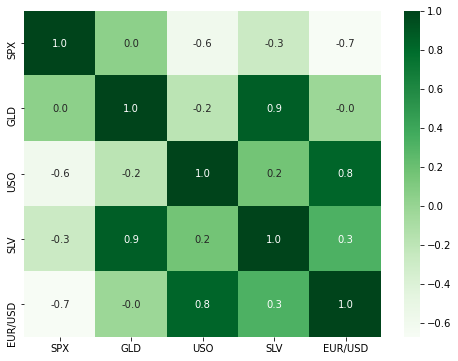

In [9]:
plt.figure(figsize = (8,6))
sns.heatmap(corr, annot=True, cbar=True,fmt="0.1f", cmap="Greens")

Text(0.5, 1.0, 'Commodity Prices')

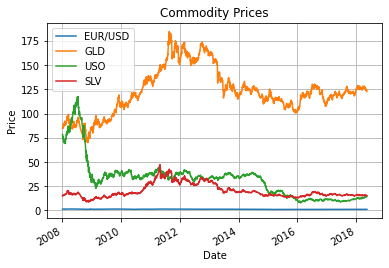

In [10]:

gold_data.plot("Date",["EUR/USD", "GLD","USO", "SLV"], grid=True)
plt.ylabel("Price")
plt.title("Commodity Prices")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

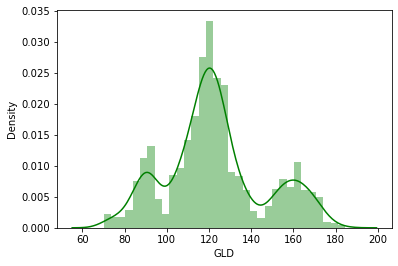

In [11]:
sns.distplot(gold_data["GLD"], color="green")

# Train Test Split

In [12]:
X = gold_data.drop(columns = ["Date", "GLD"])
Y = gold_data["GLD"]

In [13]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [14]:
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=3)

# Standardization & Model Selection

In [16]:
rf_model = RandomForestRegressor()

In [26]:
#we may choose to standardize the X_train and X_test
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)

#X_test = scaler.fit_transform(X_test)

In [17]:
rf_model.fit(X_train, Y_train)

RandomForestRegressor()

# Model Evaluation on Test Data

In [18]:
y_test_predicted = rf_model.predict(X_test)

In [19]:
y_test_predicted

array([163.88359966, 127.3218992 , 124.04369978, 119.60889898,
       126.07589936,  86.19249806, 171.82830198, 135.18780017,
       107.14300111, 132.78120207, 120.75039909, 124.76510055,
       143.46889839, 104.51079968,  80.72979898, 119.86639996,
       140.05749975,  90.69800067,  91.3887993 , 128.17470163,
       125.45560023, 147.68569928, 116.58990155, 152.91899872,
       129.27569919, 129.44940006, 118.13590095, 111.46290029,
       168.94550143, 157.42789809, 125.88600198, 154.2823006 ,
       126.92649982, 122.68909805, 117.03560091, 154.71319981,
       114.93410018, 120.50500158, 104.001102  , 106.43960034,
       135.01409882,  85.89859976, 157.45570148, 121.24279991,
       122.44530111, 155.62370024, 120.8389001 , 116.39650023,
       168.06980262, 116.75750074, 138.40360287, 161.99699841,
       158.43000078, 153.17770107, 123.86860042, 117.29350055,
       167.33049979, 117.23919982, 165.69150027,  84.43159987,
       121.37439907, 122.26200018, 120.11499992, 172.04

In [20]:
y_test_predicted.shape

(573,)

In [21]:
Y_test

863     161.990005
1351    127.580002
2284    124.570000
533     118.970001
2247    125.720001
           ...    
400     109.739998
475     110.809998
297      90.959999
2118    122.209999
1763    101.459999
Name: GLD, Length: 573, dtype: float64

In [22]:
X_test.shape

(573, 4)

In [23]:
#Root mean square error
r2_error = r2_score(Y_test, y_test_predicted)
r2_error

0.9864538301537843

# Actual vs Prediction Plotting

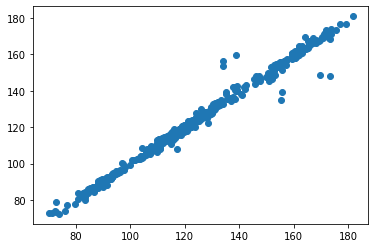

In [24]:
plt.scatter(Y_test, y_test_predicted)


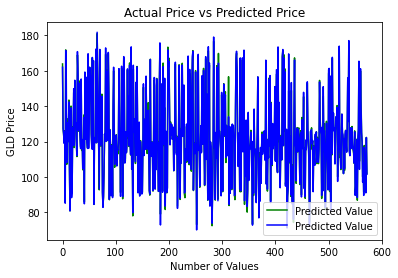

In [25]:
Y_test = list(Y_test)

plt.plot(y_test_predicted, color='green', label='Predicted Value')
plt.plot(Y_test, color='blue', label='Predicted Value')
plt.title("Actual Price vs Predicted Price")
plt.xlabel("Number of Values")
plt.ylabel("GLD Price")
plt.legend()
plt.show()

There is almost a perfect overlap between the predicted and actual test data. 
This shows that there is not much error in our model.